In [1]:
import torch.nn as nn
import torch
from torch.autograd import Variable
from sklearn.metrics import roc_auc_score
from sklearn import metrics
from sklearn import preprocessing
import matplotlib.pyplot as plt
import torch.nn.functional as F
import torch.utils.data as Data
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import numpy as np
import pandas as pd


In [2]:
def Normalize_Features(data,l,r):
    Min = np.amin(data,0)
    Max = np.amax(data,0)
    Min = Min.astype(float)
    Max = Max.astype(float)
    data = data.astype(float)
    data[:,l:r] = (data[:,l:r] - Min[l:r])/(Max[l:r] - Min[l:r]) 
    return data

In [3]:
def AUROC(Y,Y_Hat):
    Y_True = Y.numpy()
    Y_Pred = Y_Hat.numpy()
    return roc_auc_score(Y_True, Y_Pred)

In [4]:
class Get_Net(nn.Module):

    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(D - 1, H1)
        self.relu1 = nn.ReLU()
        self.dout = nn.Dropout(0.2)
        self.fc2 = nn.Linear(H1, H2)
        self.prelu = nn.PReLU(1)
        self.fc3 = nn.Linear(H2,H3)
        self.out = nn.Linear(H3, OP)
        self.out_act = nn.Sigmoid()
        
    def forward(self, input_):
        a1 = self.fc1(input_)
        h1 = self.relu1(a1)
        dout = self.dout(h1)
        a2 = self.fc2(dout)
        h2 = self.prelu(a2)
        a3 = self.fc3(h2)
        h3 = self.relu1(a3)
        a4 = self.out(h3)
        y = self.out_act(a4)
        return y

In [5]:
import torch.utils.data
class Sampler(torch.utils.data.Sampler):
    def __init__(self, data_source):
        pass

    def __iter__(self):
        raise NotImplementedError

    def __len__(self):
        raise NotImplementedError

class StratifiedSampler(Sampler):
    def __init__(self, class_vector, batch_size):
        self.n_splits = int(class_vector.size(0) / batch_size)
        self.class_vector = class_vector

    def gen_sample_array(self):
        try:
            from sklearn.model_selection import StratifiedShuffleSplit
        except:
            print('Need scikit-learn for this functionality')
        import numpy as np
        
        s = StratifiedShuffleSplit(n_splits=self.n_splits, test_size=0.5)
        X = torch.randn(self.class_vector.size(0),2).numpy()
        y = self.class_vector.numpy()
        s.get_n_splits(X, y)

        train_index, test_index = next(s.split(X, y))
        return np.hstack([train_index, test_index])

    def __iter__(self):
        return iter(self.gen_sample_array())

    def __len__(self):
        return len(self.class_vector)

In [6]:
def Solve(X,Y):
    Net = Get_Net()
    Loss_Func = nn.BCELoss()
    Optimizer = torch.optim.Adam(Net.parameters(), lr = LR, betas = (0.9, 0.999))
    Torch_Dataset = Data.TensorDataset(X,Y)
    Loader = Data.DataLoader(
        dataset = Torch_Dataset,
        batch_size = BATCH_SIZE,
        shuffle = True,
        num_workers = 4,
    )
    for Epoch in range(EPOCH):
        cnt = 0
        s = 0
        for step, (Batch_X,Batch_Y) in enumerate(Loader):
            Optimizer.zero_grad()
            B_X = Variable(Batch_X)
            B_Y = Variable(Batch_Y)
            Prediction = Net(B_X)
            Loss = Loss_Func(Prediction.squeeze(),B_Y)
            s = s + Loss.data.item()
            cnt = cnt + 1
            Loss.backward()
            Optimizer.step()
        print(s / cnt)
    return Net
    
    

['VAR1', 'VAR2', 'VAR3', 'VAR14', 'VAR16', 'VAR17', 'VAR18', 'VAR19', 'VAR20', 'VAR73', 'VAR74', 'VAR75', 'VAR76', 'VAR77', 'VAR78', 'VAR79', 'VAR80', 'VAR81', 'VAR82', 'VAR83', 'VAR84', 'VAR85', 'VAR91', 'VAR94', 'VAR101', 'VAR111', 'VAR127', 'VAR129', 'VAR130', 'VAR131', 'VAR132', 'VAR137', 'VAR138', 'VAR139', 'VAR146', 'VAR147', 'VAR148', 'VAR149', 'VAR150', 'VAR153', 'VAR154', 'VAR155', 'VAR156', 'VAR159', 'VAR160', 'VAR162', 'VAR179', 'VAR180', 'VAR186', 'VAR187', 'VAR189', 'VAR190', 'VAR191', 'VAR208', 'VAR209', 'VAR222', 'VAR223', 'VAR224', 'VAR225']
Dropping Unncessesary Columns...
Filling NaN Data...
Scaling Data 167 Columns...
Training 15718 Data Points
0.5085430711628945
0.4943997859954834
0.4932078246057518
0.4899175472375823
0.48838014994573786
0.4884287120426089
0.48979034786665343
0.4868539597505961
0.4845381142283843
0.4855553189186546
0.4847260309549851
0.4910432688165002
0.4853233101709587
0.48399413425505644
0.4840988789389773
0.48268785367045947
0.4860872334035916
0

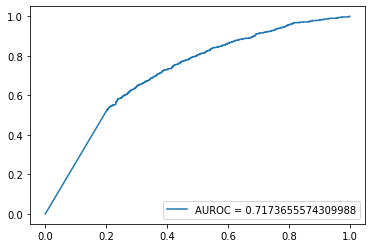

Training 8739 Data Points
0.4808298335784543
0.44759360325597497
0.44932448189624036
0.4643344462570483
0.45070496680092637
0.4405370835405197
0.4392755829396039
0.44152387362109485
0.4369545803561698
0.43482113857991506
0.438816610424623
0.43567553265903985
0.43552574961289875
0.4356296695496914
0.4348101762198184
0.4330083550001583
0.4307941030574976
0.42895815271313176
0.43635953185114545
0.43083538762191786
0.4307677350992704
0.4366861810758166
0.43218736258083884
0.43482062835110363
0.43145428608803854
0.4296040331305814
0.4297221543090622
0.4309866967318702
0.42954548570687756
0.4327450999922126
0.43151740245792986
0.4267544270540676
0.4334389373225017
0.4348783141722644
0.43111776761765025
0.4297223785334695
0.42947250718835495
0.4275114760618575
0.42674176242664785
0.4275871373060411
0.43092397714618347
0.4279809105787834
0.42923177974502535
0.42564681837212864
0.43064861222557776
0.43512221583484734
0.43545761155168505
0.427009606502787
0.4320041581335729
0.4293648987790964
0.

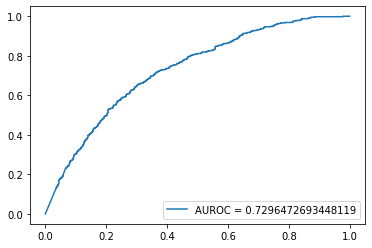

Training 15673 Data Points
0.44644904249176687
0.43629596653033276
0.4368028282815096
0.4294912501257293
0.43491398768157374
0.42721174727289046
0.4254669001516031
0.4233835280245664
0.42576996220313773
0.42599320952989617
0.42821399338391364
0.42203851132368553
0.42451574568237577
0.4224020821707589
0.4206872305699757
0.4226156212541522
0.42074881734288466
0.4263535562218452
0.42655680057953815
0.4255603777206674
0.4197692573070526
0.41877042490000627
0.4170706206742598
0.42348542468888417
0.42149747023168876
0.421105210756769
0.42036237661935844
0.41803599726788854
0.420218237778362
0.4182256426434128
0.42318755193632474
0.41906149080213234
0.41530722571270806
0.4148003683102374
0.41631322393611986
0.4175580651176219
0.41906620662431326
0.4151321282800363
0.4169000962863163
0.4163596536127888
0.44567011391021766
0.41995457952119863
0.4166019291902075
0.42105192353530807
0.4168929184882008
0.418044061168116
0.41657889330265474
0.41520556771025363
0.41626546271905607
0.4176973157695361

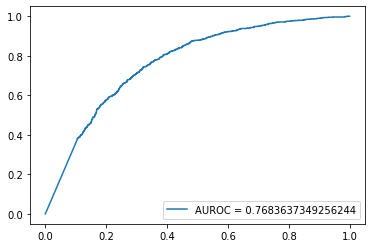

Training 15532 Data Points
0.4276755588290132
0.41183284403365333
0.4069306848900308
0.4089117912046703
0.4055591925917339
0.3987773177309782
0.4049049840603836
0.3994392298560574
0.39961911498764413
0.3966681470044356
0.39772333333521714
0.3996202048266866
0.39765693256516516
0.3975254928869475
0.4000221037233072
0.3991515585240513
0.3986335480164108
0.40091309582990875
0.39963970069654686
0.39943929927216637
0.39690089713276167
0.3947194656472147
0.40303919341706446
0.4142182720480142
0.39752263312109215
0.3991612922323584
0.3961834374646591
0.39489423716632427
0.39413278362878557
0.39538635485211515
0.3943999131888519
0.39691932024165927
0.39480334069625833
0.3955653766361774
0.39474046497065346
0.39365228615057324
0.3952487292603701
0.3956080802980764
0.39551327668835595
0.39427227192700154
0.3962792807369811
0.3951345790376879
0.3945878557707547
0.39405584307732405
0.39242507364033674
0.39224773924414513
0.39420316202772987
0.39448673176912613
0.39649961290904034
0.402451540155665

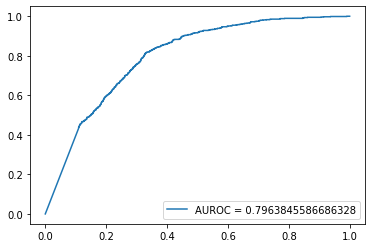

Training 15700 Data Points
0.47001473854491277
0.46030881912912225
0.4590522897279918
0.4591325158196409
0.45738230445355843
0.4581630125854263
0.46261821283585186
0.4586711192082485
0.4613677542466981
0.45821514455582607
0.45391650904584563
0.45427342712150814
0.45417709942990553
0.46033447586348974
0.45581436952359805
0.4535386064630419
0.4536297574123394
0.4547410012505448
0.45281586372682375
0.45206915112231266
0.4542028763750663
0.4518726045633771
0.4526422187352132
0.4521582333594864
0.4514634826518368
0.4518944493015041
0.4508160140873701
0.45229247925602006
0.450196170606584
0.45050539452650884
0.4538549687371963
0.45462421298998196
0.4508072682286474
0.45013887709852635
0.4501642738364622
0.4507935769749756
0.4511464917975385
0.4515732984132534
0.4499890268638032
0.4534969949248852
0.4510829163423138
0.4502209836499511
0.45042898446746366
0.44957589796628583
0.44898810421255114
0.4484804179481479
0.44889049329121583
0.45147434562869565
0.44744384158288875
0.44868816201652867
0

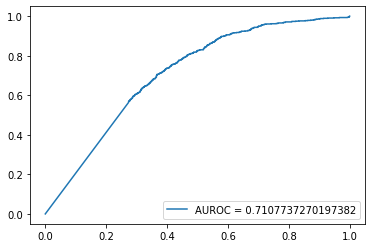

Training 15760 Data Points
0.4502854058273424
0.4335356284590328
0.4262586798496227
0.4226276590422733
0.42646685086991676
0.4200484248494038
0.420248629445962
0.42170673614825005
0.4172591444928554
0.4167165954504729
0.41898292771580253
0.4191876930651268
0.4167017248774639
0.41730811424236025
0.41504718553705583
0.4151006070160237
0.4287096536727754
0.4379411932179217
0.4276534930385392
0.4256381062718966
0.42444508487989646
0.42065922393034727
0.42082550994764717
0.4193312714960706
0.4195981816092079
0.4179796822233084
0.4173919446690813
0.4240996085001537
0.4210933927167018
0.42115576988422365
0.4183456989621052
0.4185689197773866
0.41644693817376605
0.417365377621525
0.41431242974123655
0.41890831557659786
0.4186731008378294
0.41476389152162213
0.4119291385941767
0.41384240292753216
0.4125630058816674
0.4136217376765083
0.4124804017328587
0.4156163846261603
0.4158606564297396
0.42546652880087343
0.42145037617813985
0.4137382348338199
0.4141770948563338
0.4141394526491784
0.4137635

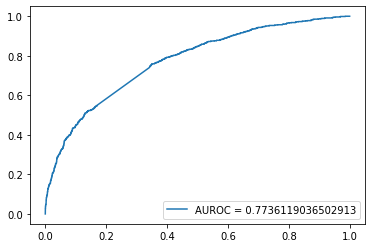

AUROC0 = 0.717366
AUROC1 = 0.729647
AUROC2 = 0.768364
AUROC3 = 0.796385
AUROC4 = 0.710774
AUROC5 = 0.773612


In [7]:
def main():
    
    Full_Data = pd.read_csv("data/training_data.csv")
    FullLabel = pd.read_csv("data/training_label.csv")
    Test_Set =  pd.read_csv("data/test_data.csv")
    
    K = Full_Data.shape[1]
    
    Cols = Full_Data.columns
    Del = []
    One_Hot_Encoder = preprocessing.OneHotEncoder(sparse = False)
    L = Full_Data.shape[0]
    for El in Cols:
        if is_string_dtype(Full_Data[El]):
#            Full_Data = pd.concat([Full_Data,pd.get_dummies(Full_Data[El], prefix = El)],axis = 1)
#            Test_Set = pd.concat([Test_Set,pd.get_dummies(Test_Set[El], prefix = El)],axis = 1)
            Del.append(El)
          
    
    print(Del)
    
    print("Dropping Unncessesary Columns...")
    Full_Data = Full_Data.drop(Del,axis = 1)
    Test_Set = Test_Set.drop(Del,axis = 1)
    
    print("Filling NaN Data...")
    Full_Data = Full_Data.fillna(Full_Data.mean())
    Test_Set = Test_Set.fillna(Test_Set.mean())

    
    K = K - len(Del)
    
    print("Scaling Data %d Columns..."%(K))
    Full_Data = pd.DataFrame(Normalize_Features(Full_Data.values,0,K))
    Test_Set = pd.DataFrame(Normalize_Features(Test_Set.values,0,K))
    
    Test_NP = Test_Set.values
    Test_X = torch.from_numpy(Test_NP[:,1:]).float()
    
    global D
    global H1
    global H2
    global H3
    global OP
    global LR
    global BATCH_SIZE
    global EPOCH
    BATCH_SIZE = 32
    EPOCH = 100
    H1 = 200
    H2 = 200
    H3 = 200
    OP = 1
    LR = 0.01
    Result = pd.DataFrame()
    AUROCList = []
    for idx in range(1,7):    
        Data_Set = Full_Data[~FullLabel.iloc[:,idx].isna()]
        LabelSet = FullLabel[~FullLabel.iloc[:,idx].isna()].iloc[:,idx]
        Data_NP = Data_Set.values
        LabelNP = LabelSet.values

        Len = len(LabelNP)
        N = int(Len * 8 / 10)
        D = Data_Set.shape[1]
        print("Training %d Data Points"%(N))
        
        Index = np.random.permutation(Len)
        Data_NP = Data_NP[Index,:]
        LabelNP = LabelNP[Index]
        
        X = torch.from_numpy(Data_NP[0:N,1:D]).float()
        Y = torch.from_numpy(LabelNP[0:N]).float()
        Valid_X = torch.from_numpy(Data_NP[N:Len,1:D]).float()
        Valid_Y = torch.from_numpy(LabelNP[N:Len]).float()
    
        Net = Solve(X,Y)
    
        Valid_P = Net(Valid_X).squeeze()
        Auroc = AUROC(Valid_Y,Valid_P.detach())
        AUROCList.append(Auroc)
        print("AUROC%d = %f"%(idx,Auroc))
        
        FP, TP, _ = metrics.roc_curve(Valid_Y,Valid_P.detach())
        plt.plot(FP,TP,label = "AUROC = " + str(Auroc))
        plt.legend(loc = 4)
        plt.show()
        
        Test_Y = Net(Test_X).squeeze()
        Test_DataFrame = pd.DataFrame(Test_Y.data.numpy())
        Result = pd.concat([Result,Test_DataFrame],axis = 1)
        
    Result.to_csv("data/test_predictions.csv")
    for idx in range(0,6):
        print("AUROC%d = %f"%(idx,AUROCList[idx]))
    
if __name__ == '__main__':
    main()
